In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
#visualize and analyze missing data in a dataset
import missingno as msno
from wordcloud import WordCloud


#from pandas_profiling import ProfileReport

# optional: set a larger figure size for matplotlib plots
plt.rcParams['figure.figsize'] = [12, 8]


In [2]:
!unzip netflix.zip

Archive:  netflix.zip
  inflating: netflix_titles.csv      


In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


***HANDLING MISSING VALUES:***

1- FILL NULLS IN director,cast,country with unknown

2- DROP NULLS IN date_added ,rating

3- convert duration to float and fill nulls in movies with median values of the duration of all movies


In [6]:
df['director'] = df['director'].fillna(value="Unknown")
df['cast'] = df['cast'].fillna(value="Unknown")
df['country'] = df['country'].fillna(value="Unknown")
df.isna().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [7]:

# Clean the 'duration' column
def clean_duration(duration):
    if pd.isna(duration):
        return np.nan  # or handle missing values differently
    else:
      try:
        return int(duration.split()[0])
      except:
        return np.nan

df['duration'] = df['duration'].apply(clean_duration)
print(df['duration'].unique())

[ 90.   2.   1.  91. 125.   9. 104. 127.   4.  67.  94.   5. 161.  61.
 166. 147. 103.  97. 106. 111.   3. 110. 105.  96. 124. 116.  98.  23.
 115. 122.  99.  88. 100.   6. 102.  93.  95.  85.  83. 113.  13. 182.
  48. 145.  87.  92.  80. 117. 128. 119. 143. 114. 118. 108.  63. 121.
 142. 154. 120.  82. 109. 101.  86. 229.  76.  89. 156. 112. 107. 129.
 135. 136. 165. 150. 133.  70.  84. 140.  78.   7.  64.  59. 139.  69.
 148. 189. 141. 130. 138.  81. 132.  10. 123.  65.  68.  66.  62.  74.
 131.  39.  46.  38.   8.  17. 126. 155. 159. 137.  12. 273.  36.  34.
  77.  60.  49.  58.  72. 204. 212.  25.  73.  29.  47.  32.  35.  71.
 149.  33.  15.  54. 224. 162.  37.  75.  79.  55. 158. 164. 173. 181.
 185.  21.  24.  51. 151.  42.  22. 134. 177.  52.  14.  53.  57.  28.
  50.  26.  45. 171.  27.  44. 146.  20. 157. 203.  41.  30. 194. 233.
 237. 230. 195. 253. 152. 190. 160. 208. 180. 144. 174. 170. 192. 209.
 187. 172.  16. 186.  11. 193. 176.  56. 169.  40. 168. 312. 153. 214.
  31. 

In [8]:

# Drop rows with NaN values in the 'date_added' column
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['rating'], inplace=True)
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


nan values of duration only in movies

In [10]:
df_movies = df[df['type'] == 'Movie']
print(df_movies['duration'].isna().sum())
df_shows = df[df['type'] == 'TV Show']
print(df_shows['duration'].isna().sum())


3
0


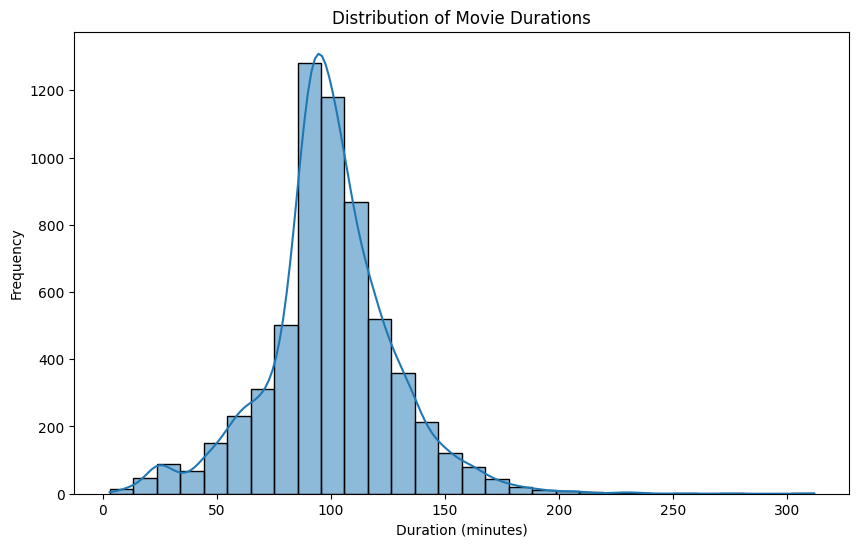

In [ ]:
# distribution of duration of movies

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# fill nan in duration with median of duration of movies

# Calculate the median duration for movies
median_duration = df_movies['duration'].median()

# Fill NaN values in 'duration' with the median duration
df['duration'].fillna(median_duration, inplace=True)

print(median_duration)

98.0


<ipython-input-14-0a44a8e47900>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(median_duration, inplace=True)


In [15]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [13]:
print(df['type'].unique())
print(df['rating'].unique())
print(df['duration'].nunique())
print(df['country'].nunique())
print(df['listed_in'].unique())
print(df['description'].nunique())

['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' 'UR']
210
749
['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, Internation

------------------------------------------------------------------------------------------

Conversion of data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8793 non-null   object 
 1   type          8793 non-null   object 
 2   title         8793 non-null   object 
 3   director      8793 non-null   object 
 4   cast          8793 non-null   object 
 5   country       8793 non-null   object 
 6   date_added    8793 non-null   object 
 7   release_year  8793 non-null   int64  
 8   rating        8793 non-null   object 
 9   duration      8793 non-null   float64
 10  listed_in     8793 non-null   object 
 11  description   8793 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 893.0+ KB


search for any incorrect data

In [17]:
df['show_id'].nunique()

8793

In [18]:
#drop show_id
df.drop('show_id', axis=1, inplace=True)

In [24]:
movies = df[df['type'] == 'Movie']
movies['rating'].value_counts()

,count
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


In [25]:
shows = df[df['type'] == 'TV Show']
shows['rating'].value_counts()

,count
rating,
TV-MA,1143
TV-14,730
TV-PG,321
TV-Y7,194
TV-Y,175
TV-G,94
NR,4
R,2
TV-Y7-FV,1


In [26]:

# Remove rows with '74 min' alike values in the 'rating' column
df = df[~df['rating'].str.contains('min', na=False)]

In [19]:
# distribution of release year

# Convert 'date_added' to datetime objects
df['date_added'] = df['date_added'].str.strip()  # Remove any leading/trailing spaces
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract the release year
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_day'] = df['date_added'].dt.day

df.drop('date_added', axis=1, inplace=True)


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8793.0,2014.183100,8.824128,1925.0,2013.0,2017.0,2019.0,2021.0
duration,8793.0,69.944046,50.788412,1.0,2.0,89.0,106.0,312.0
added_year,8793.0,2018.872740,1.574023,2008.0,2018.0,2019.0,2020.0,2021.0
added_month,8793.0,6.655976,3.435754,1.0,4.0,7.0,10.0,12.0
added_day,8793.0,12.499716,9.886470,1.0,1.0,13.0,20.0,31.0


In [28]:
df.describe(include='object').T

,count,unique,top,freq
type,8790,2,Movie,6126
title,8790,8790,Dick Johnson Is Dead,1
director,8790,4527,Unknown,2621
cast,8790,7679,Unknown,825
country,8790,749,United States,2809
rating,8790,14,TV-MA,3205
listed_in,8790,513,"Dramas, International Movies",362
description,8790,8758,"Paranormal activity at a lush, abandoned prope...",4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8790 non-null   object 
 1   title         8790 non-null   object 
 2   director      8790 non-null   object 
 3   cast          8790 non-null   object 
 4   country       8790 non-null   object 
 5   release_year  8790 non-null   int64  
 6   rating        8790 non-null   object 
 7   duration      8790 non-null   float64
 8   listed_in     8790 non-null   object 
 9   description   8790 non-null   object 
 10  added_year    8790 non-null   int32  
 11  added_month   8790 non-null   int32  
 12  added_day     8790 non-null   int32  
dtypes: float64(1), int32(3), int64(1), object(8)
memory usage: 858.4+ KB


In [33]:
movies = df[df['type'] == 'Movie'].reset_index(drop=True)
shows = df[df['type'] == 'TV Show'].reset_index(drop=True)
df = df.reset_index(drop=True)

***save cleaned data for dashboads***


In [34]:

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_netflix_data.csv', index=False)

In [35]:
cleaned = pd.read_csv('cleaned_netflix_data.csv')
cleaned.head(4)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_month,added_day
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24


# **Univariate Analysis**

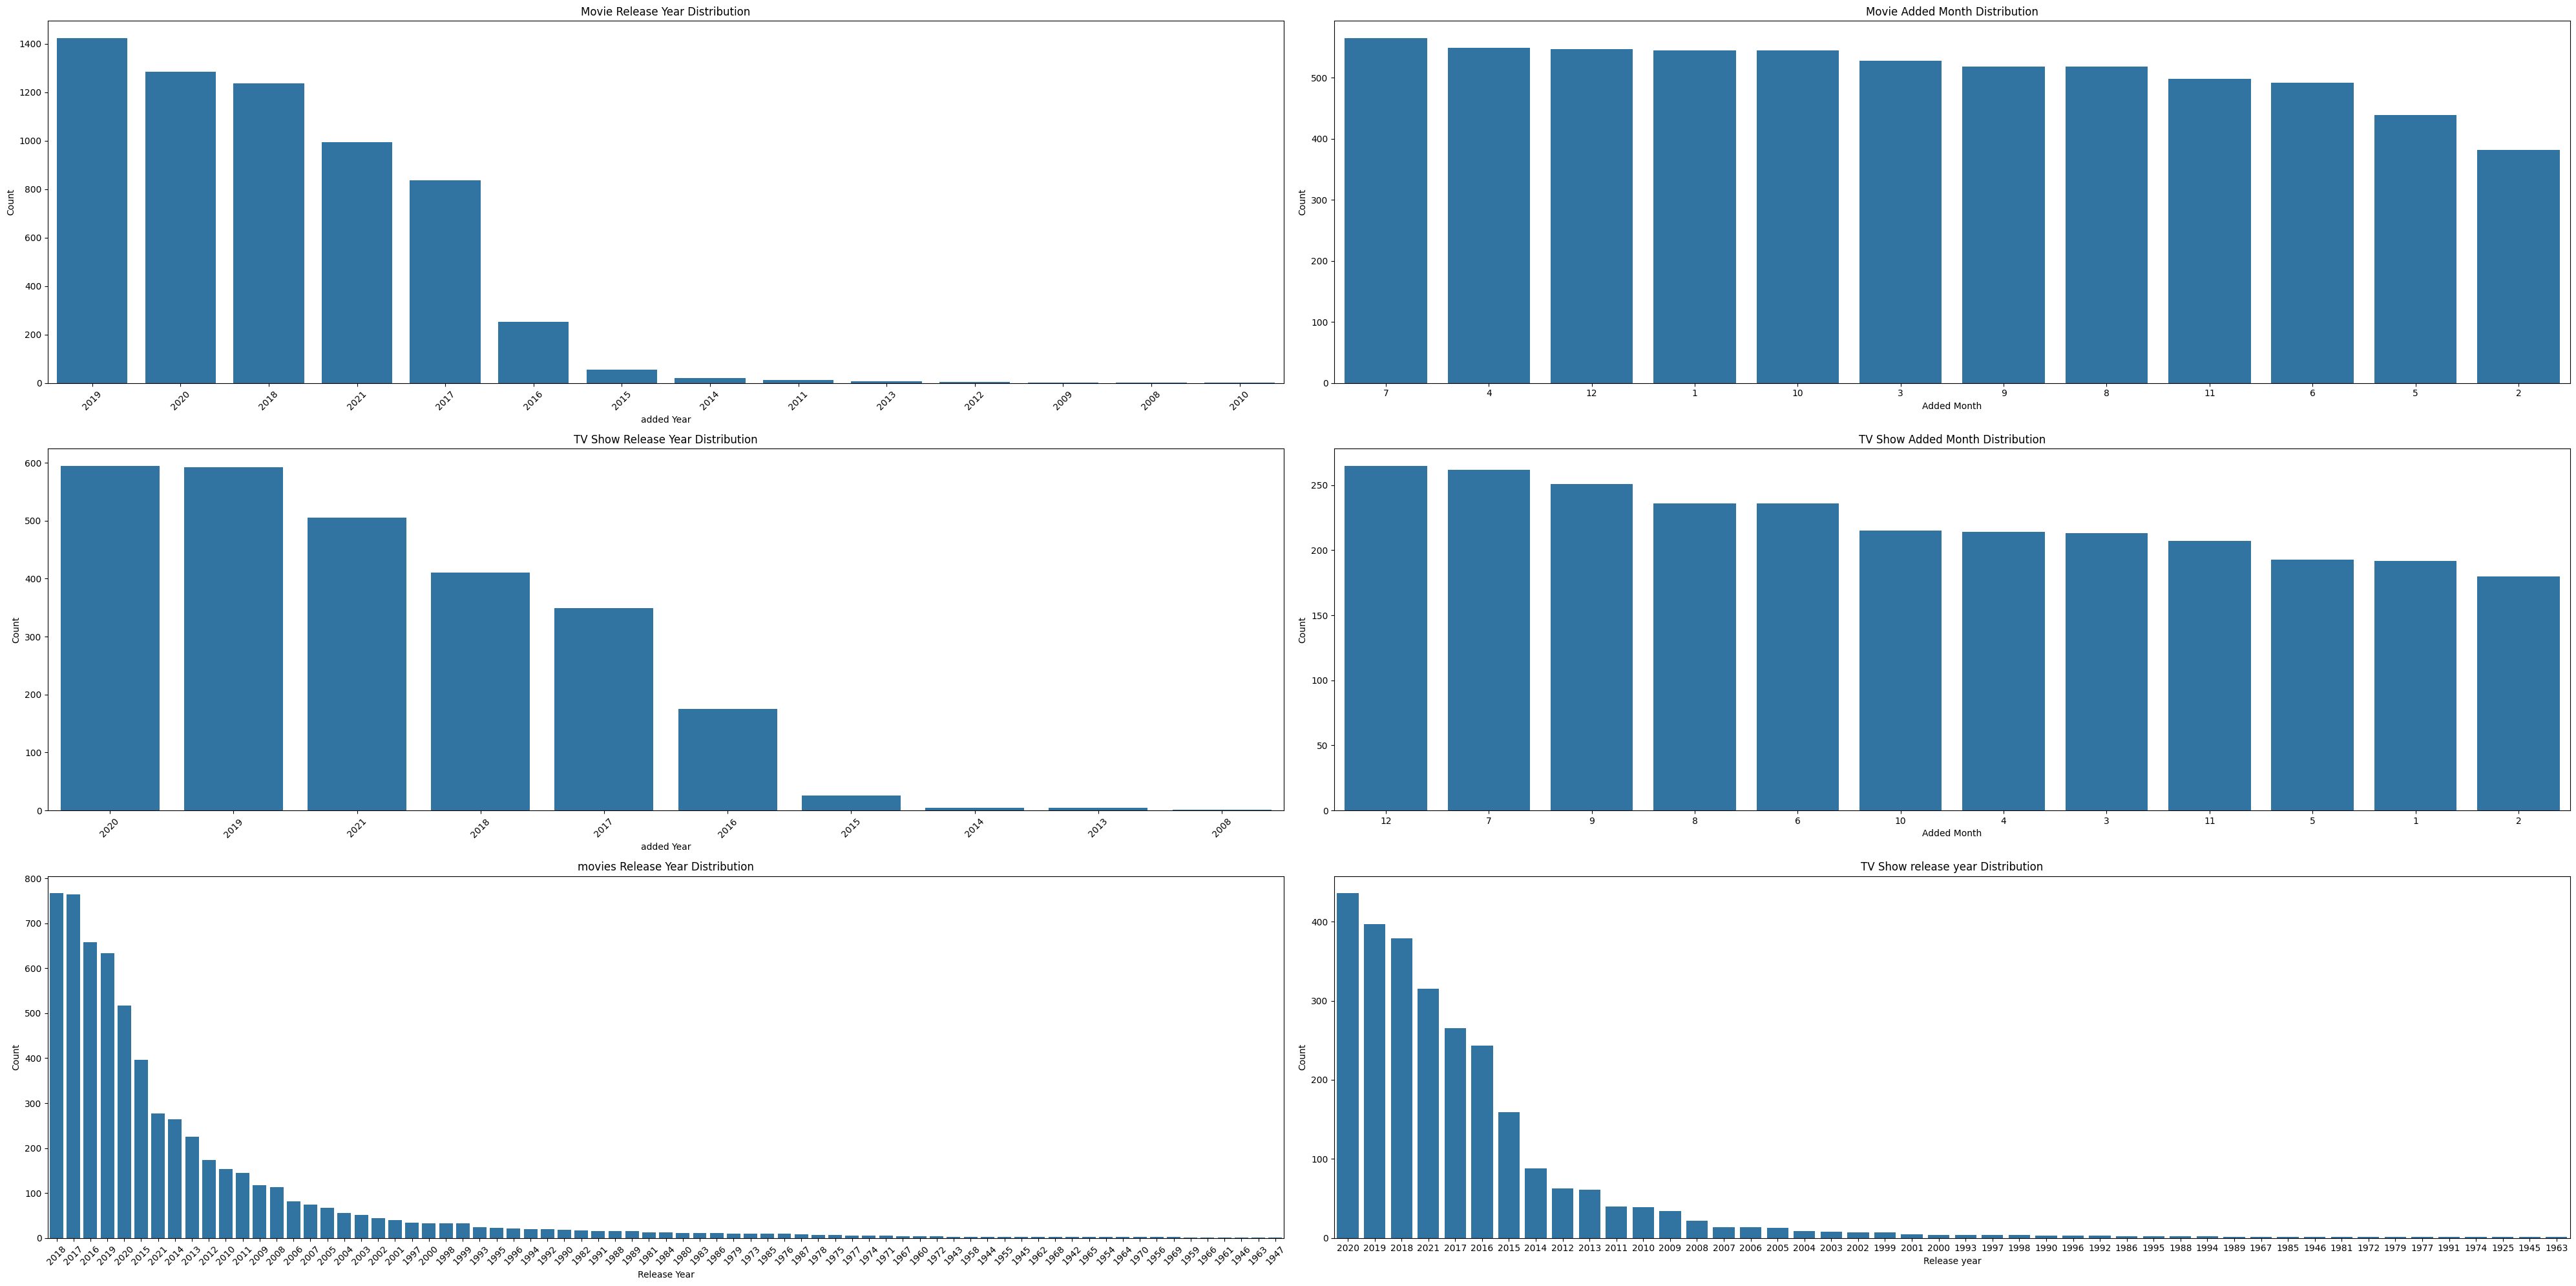

In [43]:

# Univariate analysis for 'added_year', 'added_month'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(40, 20))

# Movie Release Year
sns.countplot(x='added_year', data=movies, order=movies['added_year'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Movie Release Year Distribution')
axes[0, 0].set_xlabel('added Year')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)


# Movie added Month
sns.countplot(x='added_month', data=movies, order=movies['added_month'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Movie Added Month Distribution')
axes[0, 1].set_xlabel('Added Month')
axes[0, 1].set_ylabel('Count')

# TV Show Release Year
sns.countplot(x='added_year', data=shows, order=shows['added_year'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('TV Show Release Year Distribution')
axes[1, 0].set_xlabel('added Year')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# TV Show Added Month
sns.countplot(x='added_month', data=shows, order=shows['added_month'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('TV Show Added Month Distribution')
axes[1, 1].set_xlabel('Added Month')
axes[1, 1].set_ylabel('Count')


# movie added Year
sns.countplot(x='release_year', data=movies, order=movies['release_year'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_title('movies Release Year Distribution')
axes[2, 0].set_xlabel('Release Year')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)

# TV Show Added year

sns.countplot(x='release_year', data=shows, order=shows['release_year'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('TV Show release year Distribution')
axes[2, 1].set_xlabel('Release year')
axes[2, 1].set_ylabel('Count')
plt.tight_layout()
plt.show()

insights out of the release and added year and month:

1- movies and TV SHOWS has a sudden relaease rate drop in 2021

2- movies highly released in 2018 and shows in 2020

3- seems like shows have steedy increase over years except for 2021 and movies has gausion alike rate.

4- 7th month is highest rate of adding movies but 12 is highest for shows

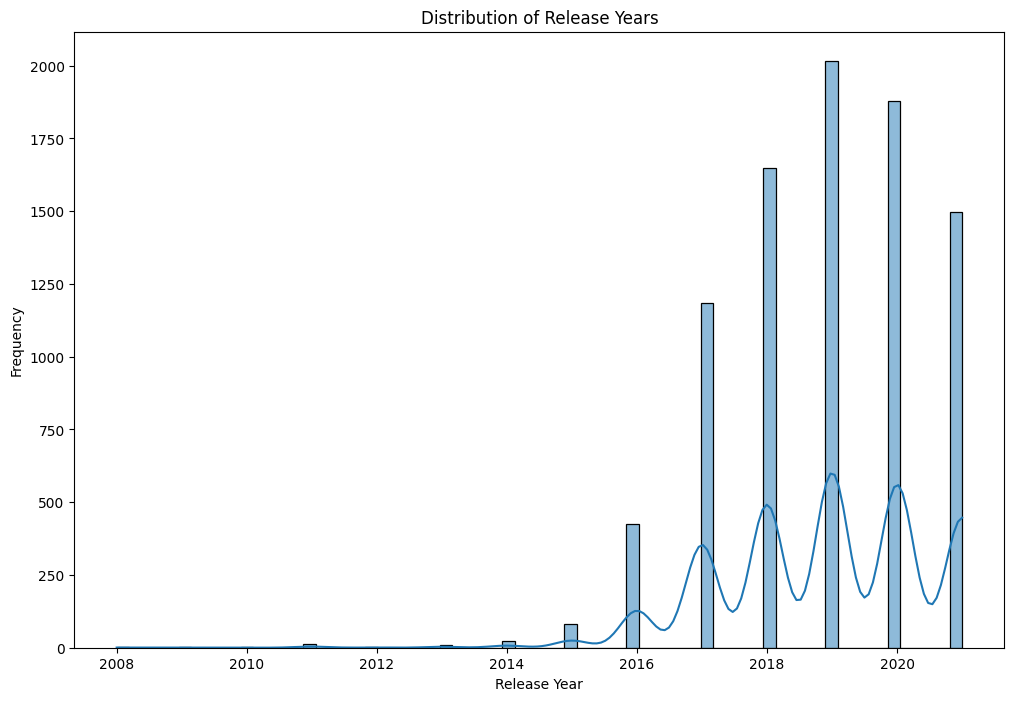

In [46]:
# Distribution of added years
sns.histplot(df['added_year'], kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

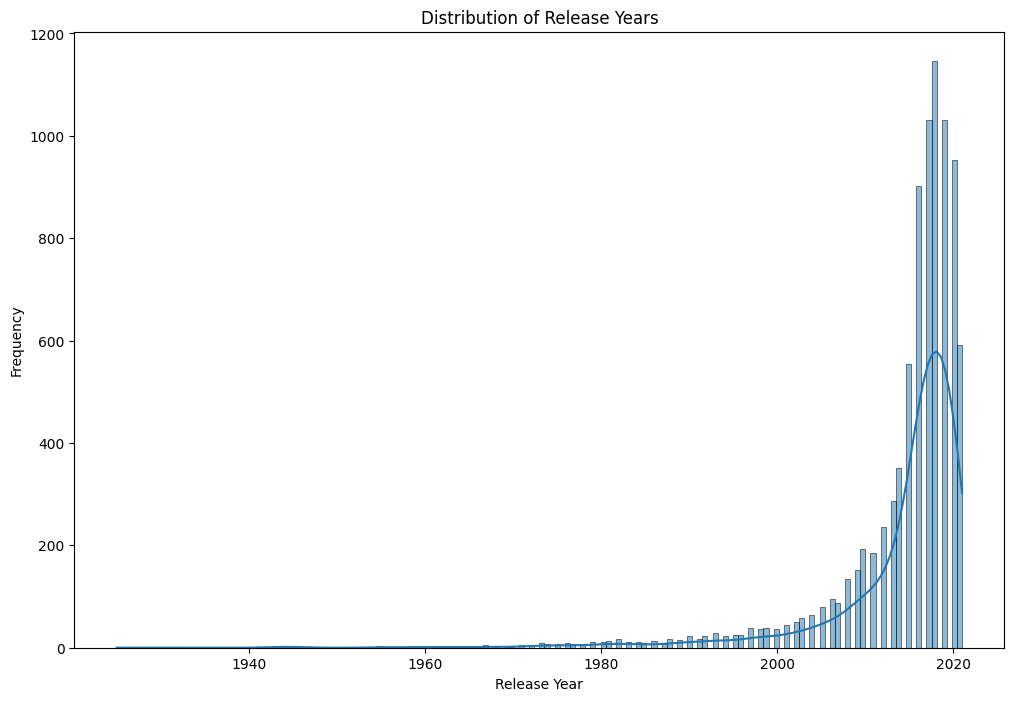

In [45]:

# Distribution of release years
sns.histplot(df['release_year'], kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Extract the year from the date_added column

# Create a contingency table
added_release_table = pd.crosstab(movies['added_year'], movies['release_year'])

# Convert the table to a data frame for better readability
added_release_df = added_release_table.reset_index().melt(id_vars='added_year', var_name='Release_Year', value_name='Count')

# Display the result
data = added_release_df[added_release_df['Count'] != 0]

In [54]:
data


,added_year,Release_Year,Count
9,2017,1942,2
23,2017,1943,3
37,2017,1944,3
51,2017,1945,3
65,2017,1946,1
...,...,...,...
992,2020,2019,194
993,2021,2019,59
1006,2020,2020,397
1007,2021,2020,120


In [59]:
# Extract the year from the date_added column

# Create a contingency table
added_release_table = pd.crosstab(shows['added_year'], shows['release_year'])

# Convert the table to a data frame for better readability
added_release_df = added_release_table.reset_index().melt(id_vars='added_year', var_name='Release_Year', value_name='Count')

# Display the result
data = added_release_df[added_release_df['Count'] != 0]
data

,added_year,Release_Year,Count
6,2018,1925,1
19,2021,1945,1
25,2017,1946,1
35,2017,1963,1
45,2017,1967,1
...,...,...,...
447,2019,2020,4
448,2020,2020,380
449,2021,2020,52
458,2020,2021,3


In [55]:
# which movies types most added in month 7

# Assuming 'df' is your DataFrame as defined in the provided code.

# Filter data for month 7
month_7_data = movies[movies['added_month'] == 7]

# Group by movie type and count occurrences
movie_type_counts = month_7_data['listed_in'].value_counts()

# Find the most added movie type
most_added_type = movie_type_counts.index[0]

print(f"The most added movie type in month 7 is: {most_added_type}")

The most added movie type in month 7 is: Dramas, International Movies


In [57]:
# which shows type most added in month 12

# Assuming 'df' is your DataFrame as defined in the provided code.

# Filter data for month 12
month_12_data = shows[shows['added_month'] == 12]

# Group by movie type and count occurrences
movie_type_counts = month_12_data['listed_in'].value_counts()

# Find the most added movie type
most_added_type = movie_type_counts.index[0]

print(f"The most added movie type in month 12 is: {most_added_type}")

The most added movie type in month 12 is: Reality TV


Based on industry standards, such as the MPAA (Motion Picture Association of America) or TV Parental Guidelines, you can rank the ratings from least restrictive to most restrictive. For example:

General Audience (Least Restrictive):
TV-Y, TV-G, G

Parental Guidance Suggested:
TV-Y7, TV-Y7-FV, TV-PG, PG

Teens and Above:
PG-13, TV-14

Mature Audience (Most Restrictive):
R, TV-MA, NC-17, NR, UR

In [60]:
# Define the hierarchy
rating_hierarchy = {
    'TV-Y': 1, 'TV-G': 2, 'G': 2,
    'TV-Y7': 3, 'TV-Y7-FV': 4, 'TV-PG': 5, 'PG': 5,
    'PG-13': 6, 'TV-14': 7,
    'R': 8, 'TV-MA': 9, 'NC-17': 10, 'NR': 10, 'UR': 10
}
# Map ratings to numerical scores
df['rating_score'] = df['rating'].map(rating_hierarchy)


In [68]:
# Filter for movies only
movies = df[df['type'] == 'Movie']

# Sort movies by rating (assuming the ratings are numeric)
top_rated_movies = movies.sort_values('rating_score', ascending=False)

# Display top-rated movies
print(top_rated_movies[top_rated_movies['rating_score'] == 10][['title']])


                                           title
7006                     How to Change the World
6050                  A Russell Peters Christmas
5984                                  13 Cameras
6741                                       Fifty
6184                  Asura: The City of Madness
...                                          ...
6715                               Exit Strategy
7453                         Miss Representation
8080  Stop at Nothing: The Lance Armstrong Story
6585                                   Democrats
7456                                Miss Stevens

[81 rows x 1 columns]


In [64]:
shows = df[df['type'] == 'TV Show']

# Sort movies by rating (assuming the ratings are numeric)

top_rated_shows = shows.sort_values('rating_score', ascending=False).head(10)

# Display top-rated movies
print(top_rated_shows[['title','rating_score']])


                             title  rating_score
7892  Russell Peters vs. the World            10
6665                      El Barco            10
8317       The Great Train Robbery            10
7582                 North & South            10
1                    Blood & Water             9
2825                   Dirty Money             9
2855                Babylon Berlin             9
5170                    The Method             9
5173     Blazing Transfer Students             9
5175                 Lady Dynamite             9


In [92]:
# in with added month the the movies have high ratings

# Assuming 'df' is your DataFrame as defined in the provided code.
# Group by 'added_month' and calculate the mean rating for each month
monthly_ratings = movies.groupby('added_month')['rating_score'].mean()

# Find the month with the highest average rating
month_with_highest_rating = monthly_ratings.idxmax()

print(f"The month with the highest average movie rating is: {month_with_highest_rating}")

# Find the months with ratings above a certain threshold (e.g., 7)
high_rating_months = monthly_ratings[monthly_ratings > 7].index.tolist()
print(f"Months with average ratings above 7: {high_rating_months}")

The month with the highest average movie rating is: 8
Months with average ratings above 7: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]


In [95]:

# Assuming 'df' is your DataFrame as defined in the provided code.
# Group by 'added_month' and calculate the mean rating for each month
monthlys_ratings = shows.groupby('added_month')['rating_score'].mean()

# Find the month with the highest average rating
months_with_highest_rating = monthlys_ratings.idxmax()

print(f"The month with the highest average show rating is: {months_with_highest_rating}")

# Find the months with ratings above a certain threshold (e.g., 7)
highS_rating_months = monthlys_ratings[monthlys_ratings > 7].index.tolist()
print(f"Months with average ratings above 7: {highS_rating_months}")

The month with the highest average show rating is: 6
Months with average ratings above 7: [2, 4, 6]


these are good timmings to add a new movie

In [72]:
# pmore than one countery can share in the createing handle this part to be fair comparison
#i mean when counting the countring look in the liast to include the country and get all the unique countries in the dataset overall

# Function to get unique countries
def get_unique_countries(df):
    all_countries = []
    for index in df.index:
        countries = df.loc[index, 'country']
        if isinstance(countries, str):  # Check if 'country' is a string
            countries_list = [c.strip() for c in countries.split(',')]
            all_countries.extend(countries_list)
    return set(all_countries)

# Get unique countries for movies and shows
unique_movie_countries = get_unique_countries(movies)
unique_show_countries = get_unique_countries(shows)

# Combine unique countries from both movies and shows
unique_countries_overall = unique_movie_countries.union(unique_show_countries)

print(f"Unique countries overall: {unique_countries_overall}")
print(f"Number of unique countries overall: {len(unique_countries_overall)}")
print(f"Number of unique countries for movies: {len(unique_movie_countries)}")
print(f"Number of unique countries for shows: {len(unique_show_countries)}")


Unique countries overall: {'', 'Jamaica', 'Slovenia', 'Sri Lanka', 'China', 'Russia', 'Botswana', 'Mongolia', 'Kazakhstan', 'Algeria', 'Cambodia', 'Paraguay', 'Georgia', 'Serbia', 'United Arab Emirates', 'Poland', 'Slovakia', 'Puerto Rico', 'Azerbaijan', 'Mozambique', 'Cyprus', 'Jordan', 'Chile', 'Soviet Union', 'Philippines', 'Colombia', 'Taiwan', 'Bermuda', 'Lithuania', 'Pakistan', 'Palestine', 'Montenegro', 'Belarus', 'Saudi Arabia', 'Italy', 'Luxembourg', 'Samoa', 'Hong Kong', 'Syria', 'Thailand', 'Malaysia', 'Sweden', 'Australia', 'Denmark', 'Cayman Islands', 'Bahamas', 'Bulgaria', 'New Zealand', 'Germany', 'Finland', 'Turkey', 'Brazil', 'Singapore', 'Ireland', 'Nicaragua', 'Iraq', 'Spain', 'Somalia', 'Angola', 'Uruguay', 'Egypt', 'Argentina', 'Cameroon', 'Mauritius', 'Belgium', 'Hungary', 'Norway', 'Uganda', 'Senegal', 'Austria', 'Afghanistan', 'Japan', 'Kenya', 'Venezuela', 'Kuwait', 'Panama', 'Ecuador', 'Dominican Republic', 'Israel', 'Burkina Faso', 'India', 'Malawi', 'Ethiopi

In [74]:

# Example usage to count occurrences, considering multiple countries:
def count_country_occurrences(df, country_name):
  count = 0
  for index in df.index:
      countries = df.loc[index, 'country']
      if isinstance(countries, str) and country_name in [c.strip() for c in countries.split(',')]:
          count += 1
  return count

# Example
country_to_count = "United States"
country_count = count_country_occurrences(movies, country_to_count)
print(f"Number of occurrences of {country_to_count}: {country_count}")




Number of occurrences of United States: 2749


In [75]:


def get_high_contribution_countries(df, content_type):
    """
    Identifies countries with high contributions to movies or shows.

    Args:
        df: The DataFrame containing the movie/show data.
        content_type: A string specifying either 'Movie' or 'TV Show'.

    Returns:
         A list of countries with high contribution.
    """
    # Filter the DataFrame by the specified content type
    filtered_df = df[df['type'] == content_type]

    # Create a dictionary to store the country and their contribution
    country_contributions = {}
    for index in filtered_df.index:
        countries = filtered_df.loc[index, 'country']
        if isinstance(countries, str):  # Check if 'country' is a string
            countries_list = [c.strip() for c in countries.split(',')]
            for country in countries_list:
                country_contributions[country] = country_contributions.get(country, 0) + 1

    # Find countries with contribution greater than average
    average_contribution = sum(country_contributions.values()) / len(country_contributions) if country_contributions else 0
    high_contribution_countries = [country for country, count in country_contributions.items() if count > average_contribution]

    return high_contribution_countries

# Example usage
high_contribution_movies = get_high_contribution_countries(df, 'Movie')
high_contribution_shows = get_high_contribution_countries(df, 'TV Show')

print("Countries with high contribution in movies:", high_contribution_movies)
print("Countries with high contribution in shows:", high_contribution_shows)

Countries with high contribution in movies: ['United States', 'Unknown', 'United Kingdom', 'Germany', 'India', 'France', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain', 'Australia', 'Mexico', 'Italy', 'Argentina', 'Hong Kong', 'Brazil', 'Belgium', 'Indonesia', 'Egypt', 'Philippines', 'Turkey']
Countries with high contribution in shows: ['Unknown', 'India', 'United Kingdom', 'United States', 'Mexico', 'Australia', 'Japan', 'France', 'South Korea', 'Spain', 'Taiwan', 'Canada', 'China']


In [84]:
# take these countries and see what kind of movies they contibute in most using listed in

def get_top_genres_by_country(df, country):
    """
    Gets the top genres of movies/shows from a specific country.

    Args:
        df: The DataFrame containing the movie/show data.
        country: The name of the country to analyze.

    Returns:
        A pandas Series with the top genres and their counts.
    """
    # Filter the DataFrame by the specified country
    country_df = df[df['country'].str.contains(country, na=False)]

    # If no movies/shows found for the specified country
    if country_df.empty:
        return pd.Series()

    # Get the top genres and their counts
    top_genres = country_df['listed_in'].str.split(', ').explode().value_counts()
    return top_genres

# Example usage
country_name = "United States"  # Replace with the country you want to analyze
top_genres_by_country = get_top_genres_by_country(movies, country_name)

if not top_genres_by_country.empty:
    print(f"Top Genres for {country_name}:\n{top_genres_by_country}")
else:
    print(f"No data found for {country_name}.")

Top Genres for United States:
listed_in
Dramas                      835
Comedies                    680
Documentaries               512
Action & Adventure          404
Children & Family Movies    390
Independent Movies          390
Thrillers                   292
Romantic Movies             225
Stand-Up Comedy             216
Horror Movies               201
Sci-Fi & Fantasy            181
International Movies        166
Music & Musicals            147
Sports Movies               113
Classic Movies               81
LGBTQ Movies                 63
Cult Movies                  52
Faith & Spirituality         42
Movies                       19
Anime Features                7
Name: count, dtype: int64


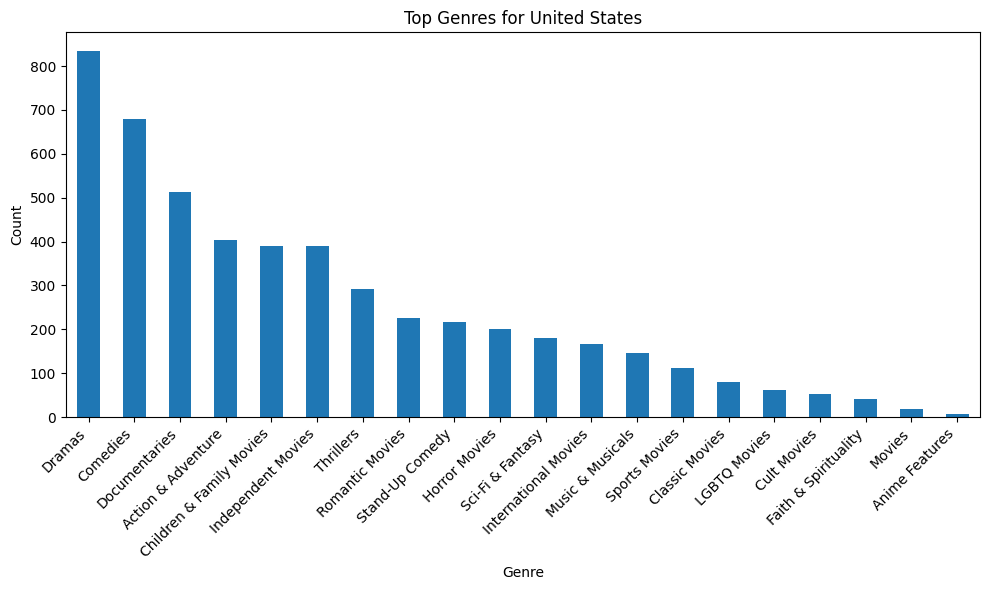

In [85]:
#visualize top_genres_by_country

plt.figure(figsize=(10, 6))
top_genres_by_country.plot(kind='bar')
plt.title(f'Top Genres for {country_name}')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
# Example usage
countrys_name = "India"  # Replace with the country you want to analyze
top_genres_by_countrys = get_top_genres_by_country(shows, countrys_name)

if not top_genres_by_country.empty:
    print(f"Top Genres for {country_name}:\n{top_genres_by_countrys}")
else:
    print(f"No data found for {country_name}.")

Top Genres for United States:
listed_in
International TV Shows          66
TV Dramas                       28
TV Comedies                     26
Romantic TV Shows               12
Kids' TV                        12
Crime TV Shows                   9
Docuseries                       9
TV Horror                        7
Reality TV                       6
TV Action & Adventure            5
British TV Shows                 3
TV Shows                         3
TV Sci-Fi & Fantasy              3
Stand-Up Comedy & Talk Shows     3
TV Thrillers                     3
TV Mysteries                     2
Teen TV Shows                    1
Name: count, dtype: int64


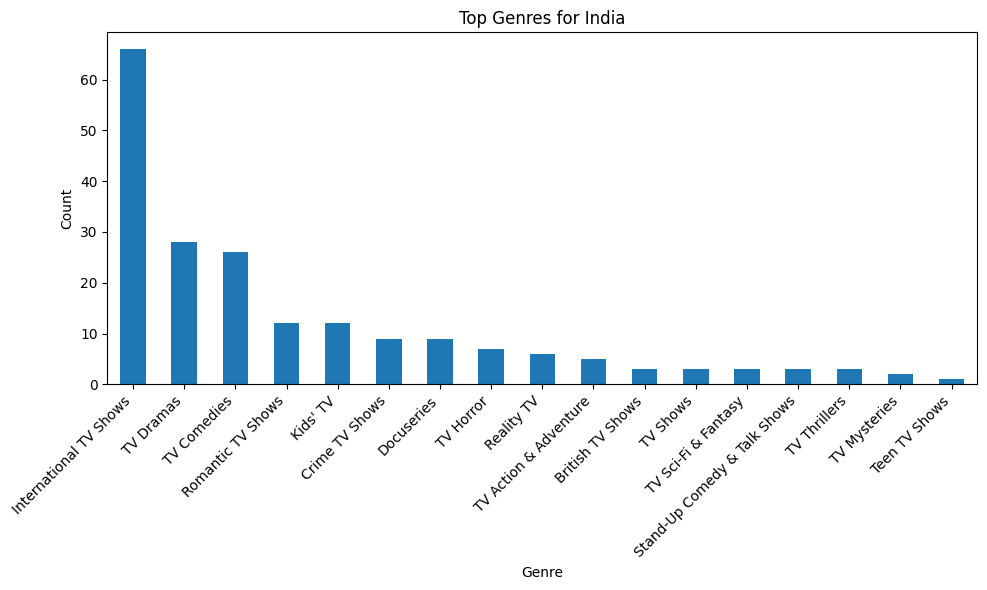

In [88]:
# visualize top_genres_by_countrys

plt.figure(figsize=(10, 6))
top_genres_by_countrys.plot(kind='bar')
plt.title(f'Top Genres for {countrys_name}')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

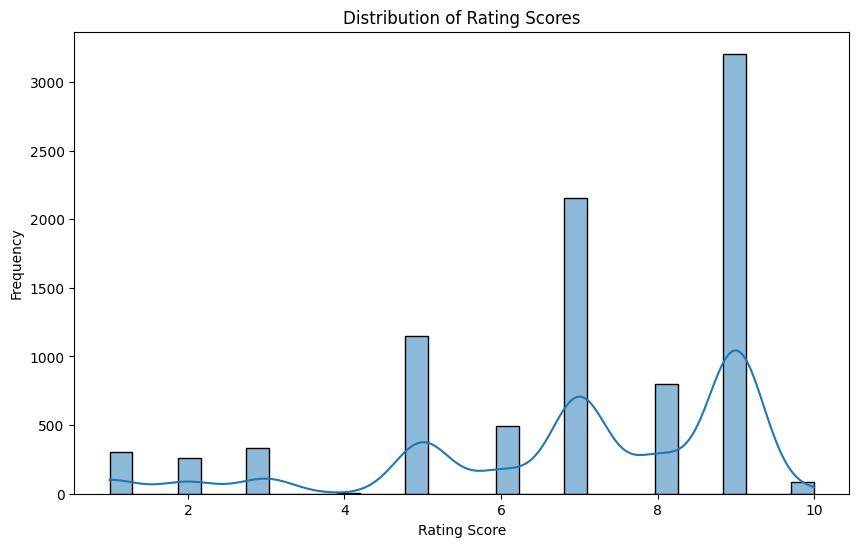

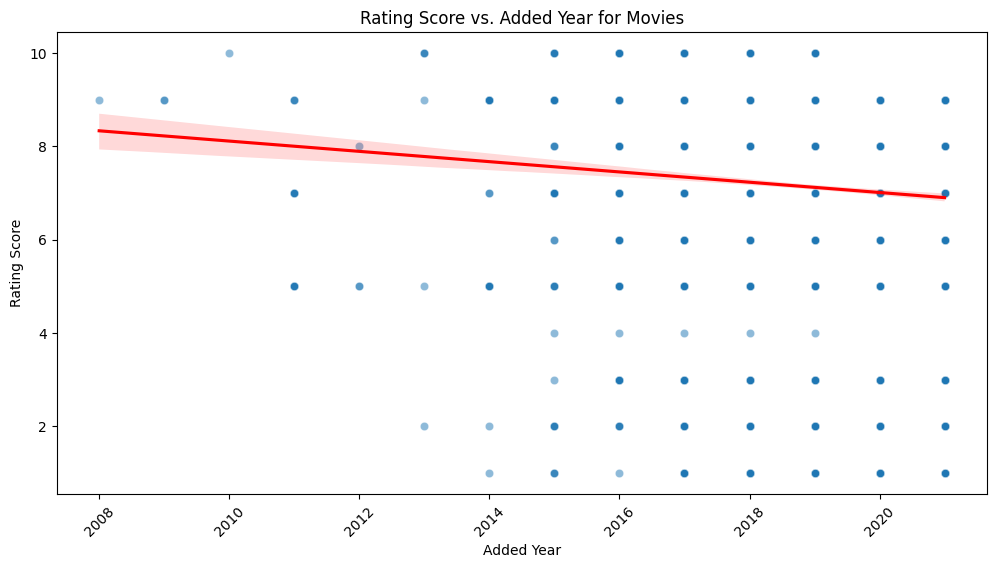

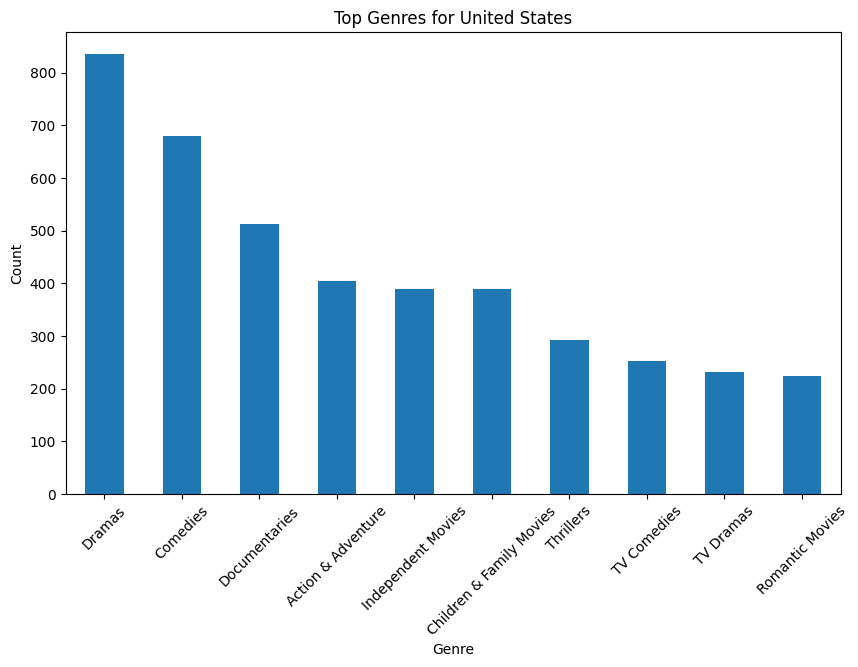

In [81]:

# Visualize the distribution of 'rating_score' for movies
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_score'], kde=True)
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

# Create the scatter plot with a trend line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='added_year', y='rating_score', data=movies, alpha=0.5)
sns.regplot(x='added_year', y='rating_score', data=movies, scatter=False, color='red')
plt.title('Rating Score vs. Added Year for Movies')
plt.xlabel('Added Year')
plt.ylabel('Rating Score')
plt.xticks(rotation=45)
plt.show()

# Visualize the top genres by country (example for United States)
country_name = "United States"
top_genres = get_top_genres_by_country(df, country_name)

if not top_genres.empty:
    plt.figure(figsize=(10, 6))
    top_genres.head(10).plot(kind='bar') # Plot only the top 10 genres
    plt.title(f'Top Genres for {country_name}')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"No data found for {country_name}.")

# ... [Add more visualizations as needed for other analyses and filters]

In [82]:
# compare which listed movies and shows have the hight rates


# Display top-rated movies and shows based on 'rating_score'
print("Top Rated Movies:")
print(top_rated_movies[['listed_in', 'rating_score']].head(10))  # Display top 10

print("\nTop Rated TV Shows:")
print(top_rated_shows[['listed_in', 'rating_score']].head(10))  # Display top 10

Top Rated Movies:
                                              listed_in  rating_score
7006                Documentaries, International Movies            10
6050                                    Stand-Up Comedy            10
5984       Horror Movies, Independent Movies, Thrillers            10
6741                       Dramas, International Movies            10
6184   Action & Adventure, Dramas, International Movies            10
7565                                      Documentaries            10
8491  Horror Movies, Independent Movies, Internation...            10
7058   Dramas, Independent Movies, International Movies            10
6425                             Classic Movies, Dramas            10
5264                     Comedies, International Movies            10

Top Rated TV Shows:
                                              listed_in  rating_score
7892           Docuseries, Stand-Up Comedy & Talk Shows            10
6665  International TV Shows, Romantic TV Shows, Sp

                 release_year  duration  added_year  added_month  added_day  \
release_year         1.000000 -0.249988    0.111624    -0.039031   0.140190   
duration            -0.249988  1.000000    0.029028    -0.017307  -0.073673   
added_year           0.111624  0.029028    1.000000    -0.160650   0.045679   
added_month         -0.039031 -0.017307   -0.160650     1.000000   0.020705   
added_day            0.140190 -0.073673    0.045679     0.020705   1.000000   
year_difference     -0.984049  0.256193    0.066943     0.010429  -0.132577   
rating_score         0.077321  0.135543   -0.038898    -0.028342   0.095046   

                 year_difference  rating_score  
release_year           -0.984049      0.077321  
duration                0.256193      0.135543  
added_year              0.066943     -0.038898  
added_month             0.010429     -0.028342  
added_day              -0.132577      0.095046  
year_difference         1.000000     -0.084596  
rating_score           -

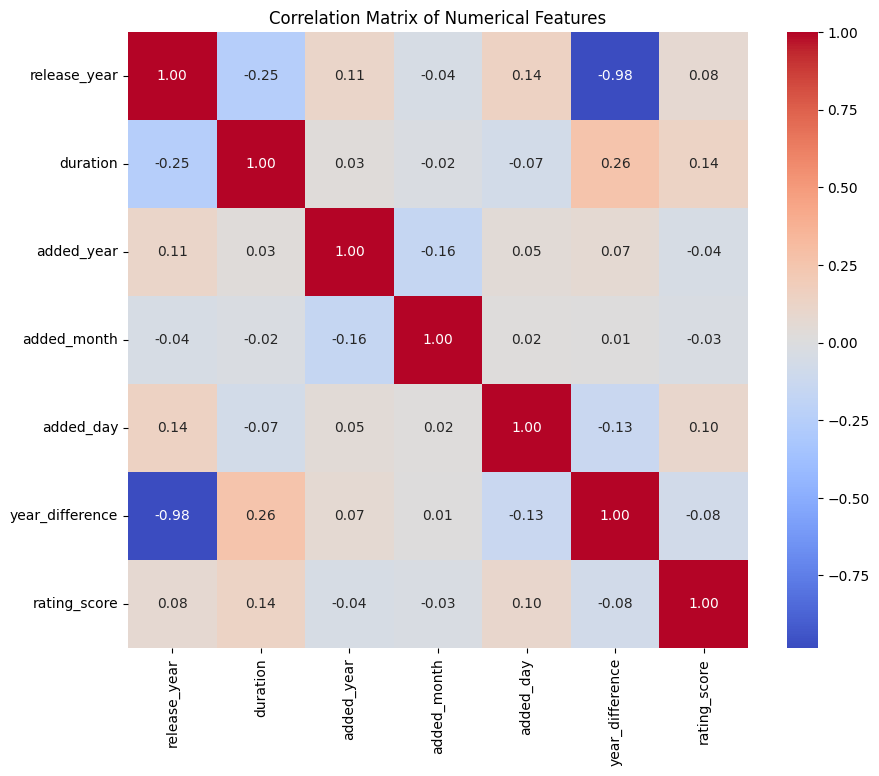

In [96]:

# Correlation between numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

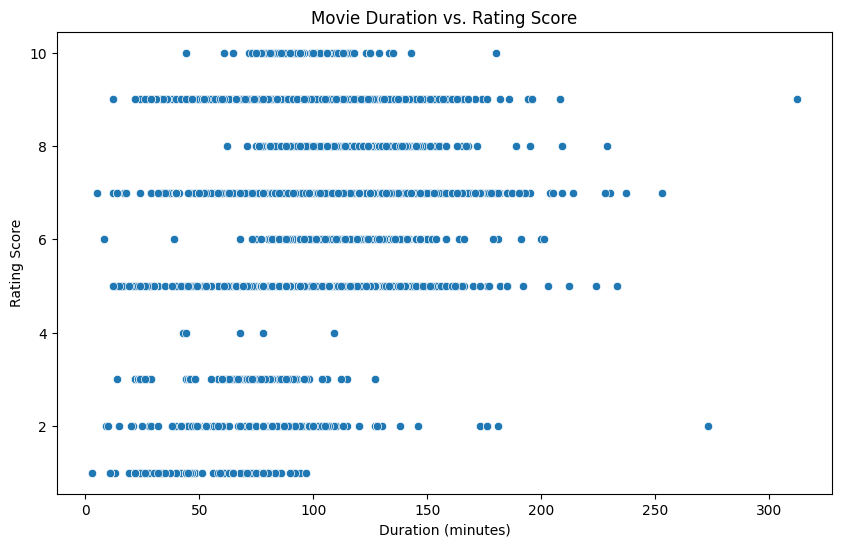

Correlation between movie duration and rating score: 0.18735221500988622


In [97]:
# does the duration of the movie affects the rating of score

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating_score', data=movies)
plt.title('Movie Duration vs. Rating Score')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating Score')
plt.show()

# Calculate the correlation
correlation = movies['duration'].corr(movies['rating_score'])
print(f"Correlation between movie duration and rating score: {correlation}")

Correlation between show duration and rating score: -0.041850914776814796


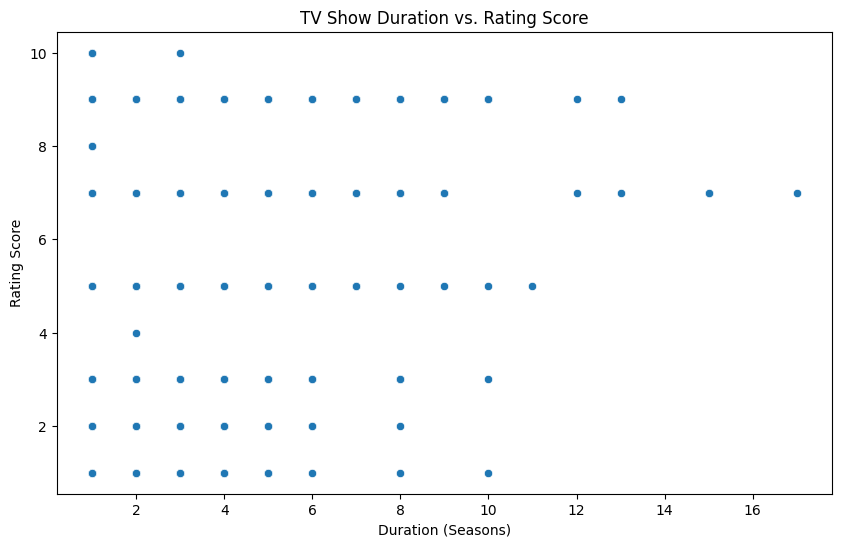

In [98]:
# does the duration of the shows affects the rating of score

# Calculate the correlation between duration and rating_score for TV shows
correlation_shows = shows['duration'].corr(shows['rating_score'])
print(f"Correlation between show duration and rating score: {correlation_shows}")

# Create the scatter plot for TV shows
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating_score', data=shows)
plt.title('TV Show Duration vs. Rating Score')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Rating Score')
plt.show()

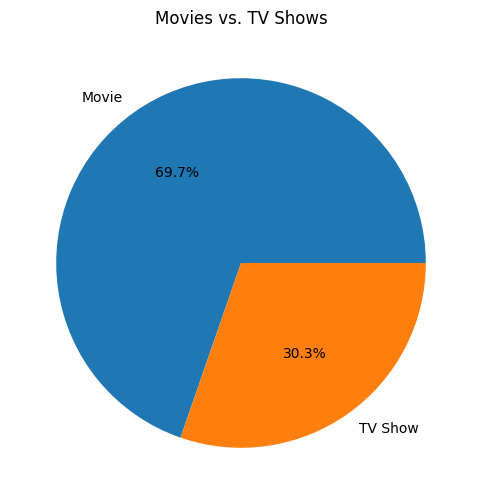

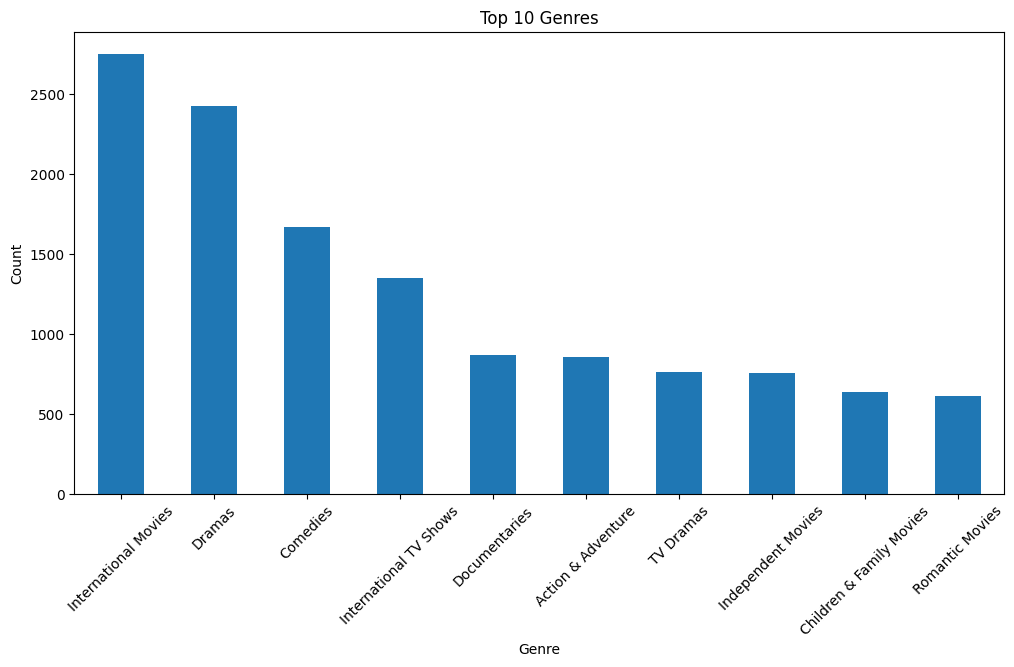

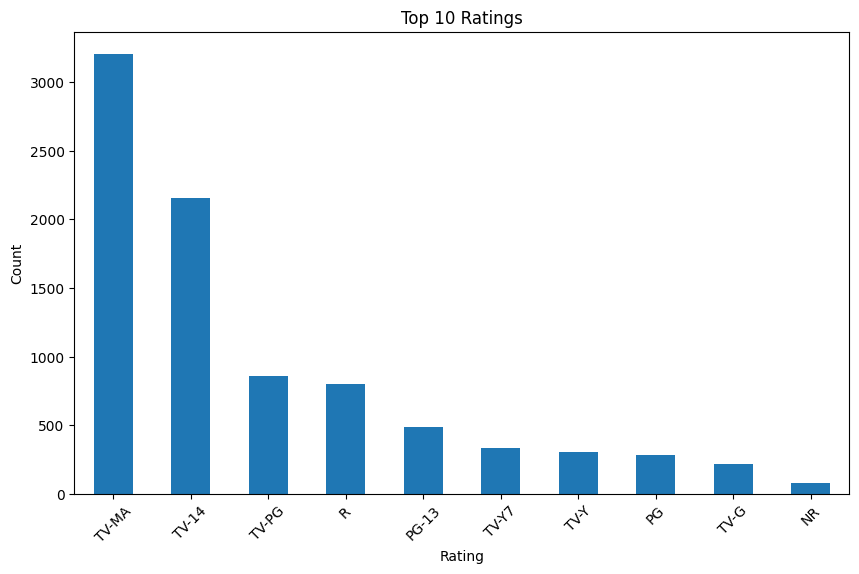

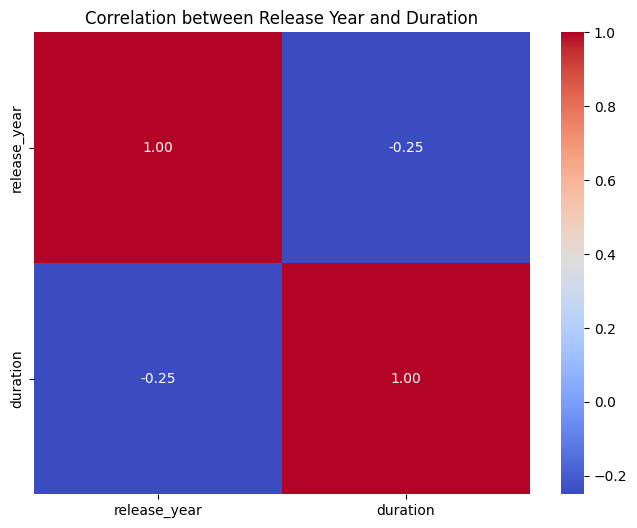

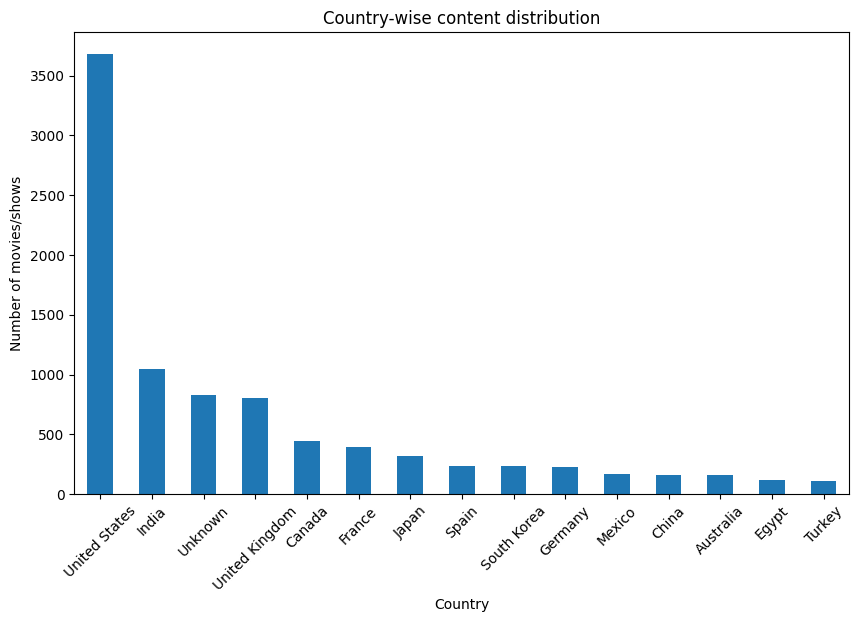

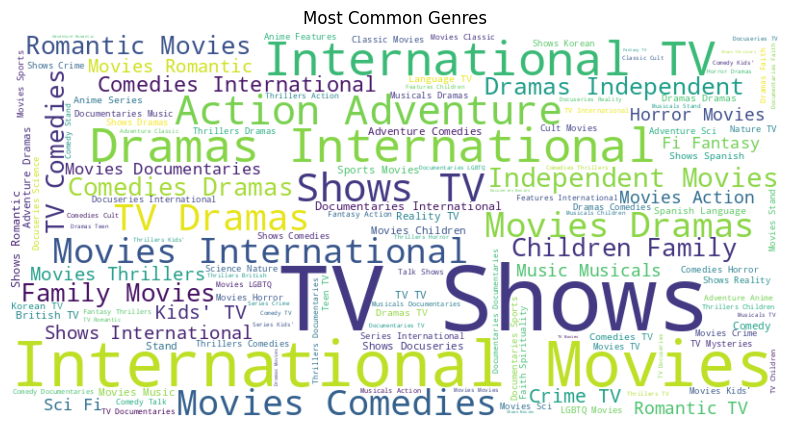

In [100]:


# Movies vs. TV Shows count
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Movies vs. TV Shows')
plt.ylabel('')  # Remove the y-axis label
plt.show()


# Top Genres
plt.figure(figsize=(12, 6))
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top Ratings
plt.figure(figsize=(10, 6))
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




# Heatmap: Correlation between release year and duration
plt.figure(figsize=(8, 6))
correlation_matrix = df[['release_year', 'duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Release Year and Duration')
plt.show()


# Geographical Map (requires library like plotly)
# This example uses the 'country' column as an example
# In a real-world scenario, this might be handled differently depending on geographic data
country_counts = df['country'].str.split(', ').explode().value_counts()
plt.figure(figsize=(10, 6))
country_counts.head(15).plot(kind='bar')  # Plotting the top 15 countries
plt.title("Country-wise content distribution")
plt.ylabel("Number of movies/shows")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


# Word Cloud: Most common genres
text = ' '.join(genre for genre in df['listed_in'].astype(str)) # Convert 'listed_in' to string type
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Genres')
plt.show()

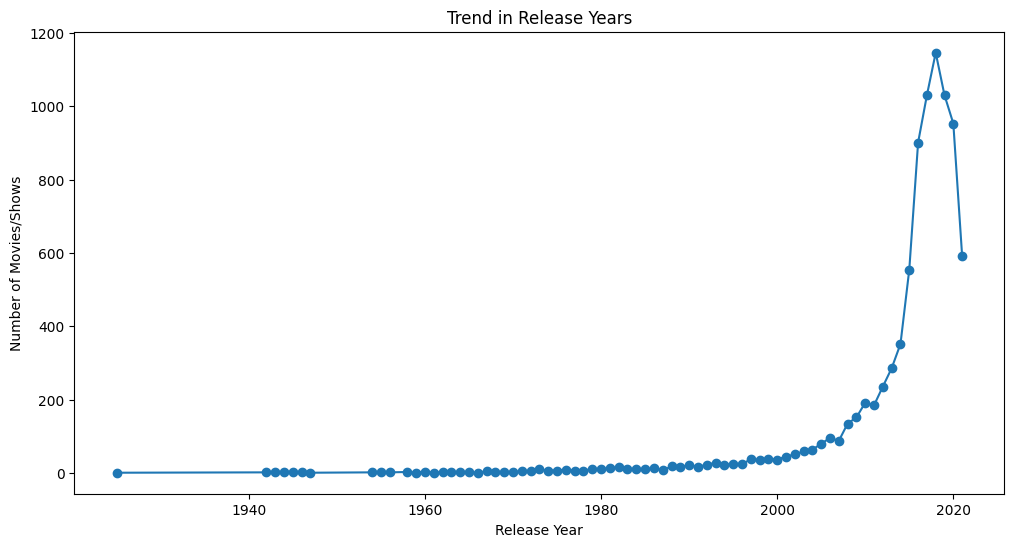

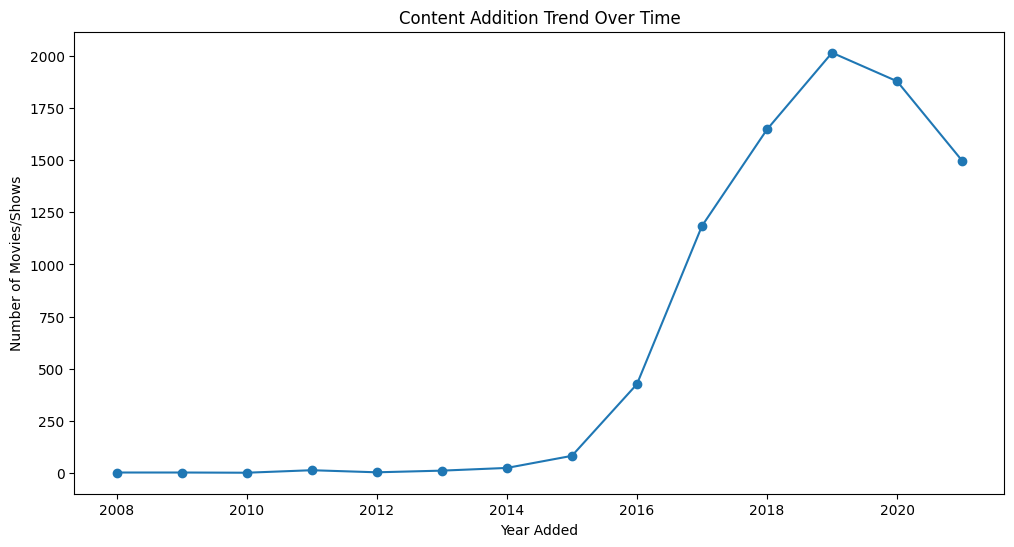

In [101]:

# Trends in release years (Line Graph)
plt.figure(figsize=(12, 6))
release_year_counts = df.groupby('release_year')['title'].count()
release_year_counts.plot(kind='line', marker='o')
plt.title('Trend in Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()


# Content addition trends over time (Line Graph)
plt.figure(figsize=(12, 6))
added_year_counts = df.groupby('added_year')['title'].count()
added_year_counts.plot(kind='line', marker='o')
plt.title('Content Addition Trend Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies/Shows')
plt.show()

data insights